### Import libraries and dataset

In [1]:
import numpy
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.np_utils import to_categorical

### Preprocess data, normalize images

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
shape of X_train:  (60000, 28, 28)
shape of X_test:  (10000, 28, 28)


### Create ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

def init():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

modelInfo = init()
modelInfo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = init()
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5031 - accuracy: 0.8236 - val_loss: 0.4233 - val_accuracy: 0.8480
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3766 - accuracy: 0.8638 - val_loss: 0.3950 - val_accuracy: 0.8566
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3356 - accuracy: 0.8781 - val_loss: 0.4077 - val_accuracy: 0.8579
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3099 - accuracy: 0.8868 - val_loss: 0.3650 - val_accuracy: 0.8665
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.8908 - val_loss: 0.3604 - val_accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8966 - val_loss: 0.3605 - val_accuracy: 0.8699
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9004 - val_loss: 0.3598 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8818


[0.338382363319397, 0.8817999958992004]

### Train model for 1 epoch and return models with current loss

In [ ]:
def train(models):
  
    losses = []
     
    for i in range(len(models)):
        history = models[i].fit(x=X_train,y=y_train, epochs=1, validation_data=(X_test, y_test))
        losses.append(round(history.history['loss'][-1], 4))
        
    return models, losses


In [ ]:
no_of_generations = 10
no_of_individuals = 10
mutate_factor = 0.1
individuals = []

layers = [1, 2]

### Define mutate function

In [ ]:
def mutate(new_individual):
    for layer in layers:
        for bias in range(len(new_individual.layers[layer].get_weights()[1])):
            n = random.random()
            if n < mutate_factor:
                new_individual.layers[layer].get_weights(
                )[1][bias] *= random.uniform(-0.5, 0.5)

    for layer in layers:
        for weight in new_individual.layers[layer].get_weights()[0]:
            n = random.random()
            if n < mutate_factor:
                for j in range(len(weight)):
                    if random.random() < mutate_factor:
                        new_individual.layers[layer].get_weights(
                        )[0][j] *= random.uniform(-0.5, 0.5)

    return new_individual

### Define crossover function

In [ ]:
def crossover(individuals_param):
    new_individuals = [individuals_param[0], individuals_param[1]]

    for j in range(2, no_of_individuals):
        if j < (no_of_individuals - 2):
            if j == 2:
                parentA = random.choice(individuals_param[:3])
                parentB = random.choice(individuals_param[:3])
            else:
                parentA = random.choice(individuals_param[:])
                parentB = random.choice(individuals_param[:])

            for j in layers:
                temp = parentA.layers[j].get_weights()[1]
                parentA.layers[j].get_weights()[1] = parentB.layers[j].get_weights()[1]
                parentB.layers[j].get_weights()[1] = temp

            new_individual = random.choice([parentA, parentB])

        else:
            new_individual = random.choice(individuals_param[:])

        new_individuals.append(mutate(new_individual))
        # new_individuals.append(new_individual)

    return new_individuals

### Define evolve function

In [ ]:
def evolve(individuals_param, losses_param):
    sorted_y_idx_list = sorted(range(len(losses_param)), key=lambda x: losses_param[x])
    individuals_param = [individuals_param[x] for x in sorted_y_idx_list]

    # winners = individuals[:6]

    new_individuals = crossover(individuals_param)

    return new_individuals


### Train individuals and evolve

In [ ]:
for i in range(no_of_individuals):
        individuals.append(init())

for generation in range(no_of_generations):
    individuals, losses = train(individuals)
    print(losses)

    individuals = evolve(individuals, losses)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5014 - accuracy: 0.8246 - val_loss: 0.4335 - val_accuracy: 0.8464
[0.4992, 0.4966, 0.4989, 0.4953, 0.5038, 0.4945, 0.4985, 0.5036, 0.4972, 0.5014]
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3337 - accuracy: 0.8777 - val_loss: 0.3764 - val_accuracy: 0.8598
[0.3751, 0.3747, 0.3371, 0.3138, 0.3707, 0.3736, 0.3352, 0.3346, 0.2962, 0.3337]
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8914 - val_loss: 0.3473 - val_accuracy: 0.8736
[0.2824, 0.2696, 0.26, 0.3111, 0.294, 0.3119, 0.251, 0.2414, 0.2337, 0.2947]
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9010 - val_loss: 0.3416 - val_accuracy: 0.8765
[0.2263, 0.2185, 0.2136, 0.2064, 0.1989, 0.196, 0.2795, 0.1896, 0.1861, 0.2671]
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1473 - accuracy: 0.9451 - val_loss: 0.3994 - val_accuracy: 0.8877
[0.181, 0.1765, 

In [4]:
model = individuals[0]
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.8865


[0.6367084383964539, 0.8865000009536743]

In [3]:
model = keras.models.load_model('./my_model.h5')

Text(0.5, 1.0, 'True label: 2 Predicted: 2')

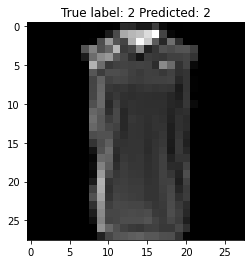

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
i = numpy.random.choice(X_test.shape[0], replace=False)
plt.imshow(X_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))